# Bike Sharing Linear Regression Model

Purpose : Bike Sharing Linear Regression model is generated to help understand the Business dynamics and demand for shared bikes across varied seasons and year

In [589]:
##Import the needed Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime

import statsmodels
import statsmodels.api as am
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

#Ignore future Warnings
import warnings
warnings.filterwarnings('ignore')

#Enable setting to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [590]:
##Load the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [591]:
#Analyze the Dataset

df.info (verbose=True,null_counts=True)

#understand the dataset and Identify columns to drop : Duplicate Columns, Null Value, Columns which do not make value
#Inference : No missing Values, drop columns dteday,mnth,instant,registered,casual,holiday

#Target Variable : cnt, Other Variables : Independent Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [592]:
df.shape

(730, 16)

In [593]:
df.drop(['dteday','instant','registered','casual'],axis=1,inplace=True)

In [594]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [595]:
#create Dummy Variables for season
season = pd.get_dummies(df['season'])
season.columns = ['spring','summer','fall','winter']
season.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [596]:
#Merge the two dataframes
df = pd.concat([df,season],axis=1)

#drop season column
df.drop(['season'],axis=1,inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0


In [597]:
#create Dummy Variables for weathersit
weather = pd.get_dummies(df['weathersit'])
weather.columns = ['Clearcloud','Mistcloud','lightSnow']
weather.head()

#Merge the two dataframes
df = pd.concat([df,weather],axis=1)

#drop weathersit column
df.drop(['weathersit'],axis=1,inplace=True)
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0


In [598]:
def cond(i):
    if i % 7 == 0: return 1
    elif i % 7 == 6: return 1
    else :return 0
    return i

df['weekend']=[cond(i) for i in df['weekday']]
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0


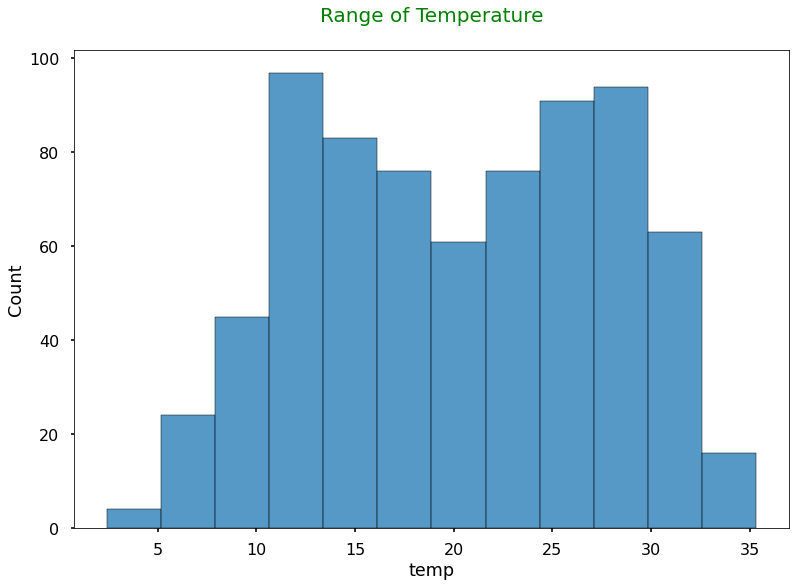

In [599]:
###Visulaize the data

sns.histplot(df['temp'])
plt.title("Range of Temperature\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

In [600]:
#Check if weekday variable is needed, this shows the data is uniformly distributed across different days of the week
df['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

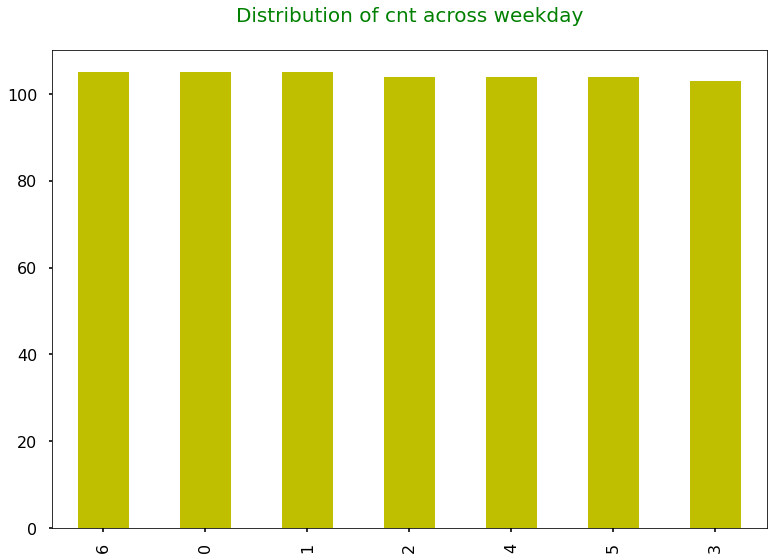

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,1,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,1
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0


In [601]:
#Distribution of cnt across weekday

plt.style.use("seaborn-poster")
df['weekday'].value_counts().plot.bar(color='y')
plt.title("Distribution of cnt across weekday\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#drop weathersit column
df.drop(['weekday'],axis=1,inplace=True)
df.head()

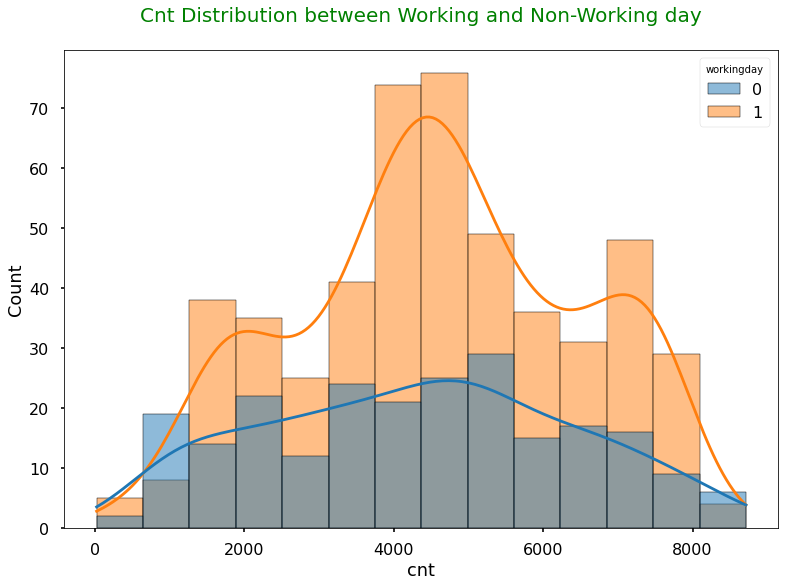

In [602]:
#Cnt Distribution between working day and non workingday

sns.histplot(data = df, x = "cnt", kde = True, hue = "workingday")
plt.title("Cnt Distribution between Working and Non-Working day\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

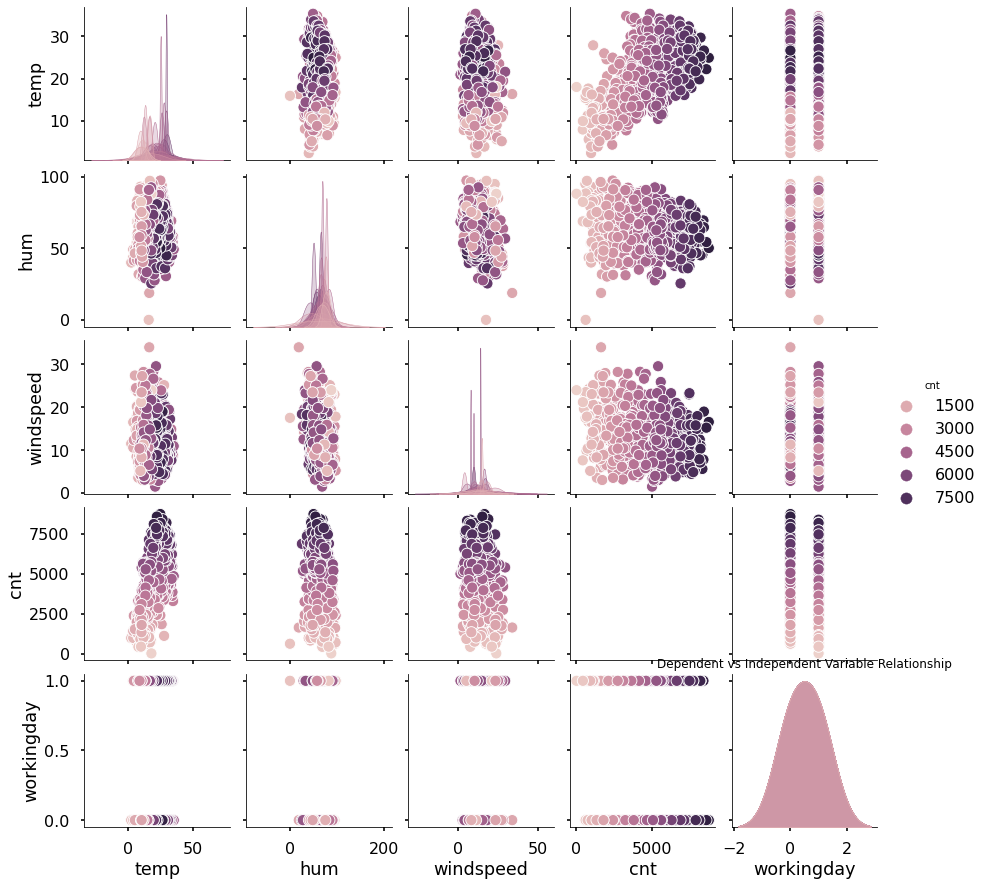

In [603]:
## Relationship between variables

sns.pairplot(
    df,
    x_vars=["temp", "hum","windspeed",'cnt',"workingday"],y_vars=["temp", "hum","windspeed",'cnt',"workingday"],hue = 'cnt')

plt.title("Dependent vs Independent Variable Relationship", fontsize=12)
plt.show()

<AxesSubplot:xlabel='temp', ylabel='cnt'>

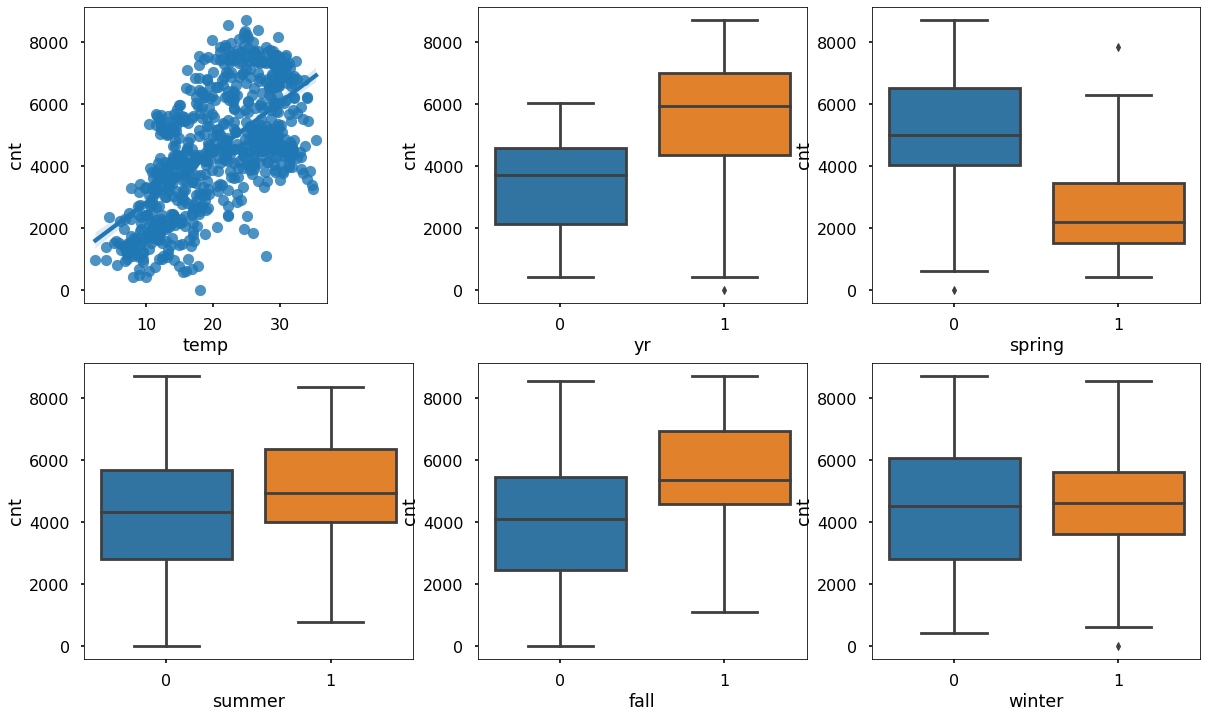

In [604]:
#Analyze different Independent Variable against the Dependent Variable

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='spring',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='summer',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='fall',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='winter',y='cnt',data=df)
            
plt.subplot(2,4,1)
sns.regplot(x='temp',y='cnt',data=df)


In [605]:
#split the Data between Train and Test data for modelling
dx_train,dx_test=train_test_split(df,train_size=0.7,random_state=100)
dx_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
576,1,7,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,1,0,1,0,0,0
426,1,3,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,1,0,1
728,1,12,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,1
482,1,4,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,1,0,1
111,0,4,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,0,1,0,0


In [606]:
dx_train.shape

(510, 17)

In [607]:
dx_test.shape
dx_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
184,0,7,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,1,0,0,1,0,0
535,1,6,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,1,0,0,0
299,0,10,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,1,0,1,0,0
221,0,8,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,1,0,1,0,0,0
152,0,6,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,1,0,0,0


In [608]:
#Min-Max scaling (Normalization)
# Variables in a different scale are normalized 

#Instatiate
scaler = MinMaxScaler()
numeric_vars = ['temp','atemp','hum','windspeed','mnth']
dx_train[numeric_vars]

dx_train[numeric_vars] = scaler.fit_transform(dx_train[numeric_vars])
dx_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,1,0,1,0,0,0
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,1,0,1
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,1
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,1,0,1
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,0,0,1,0,0


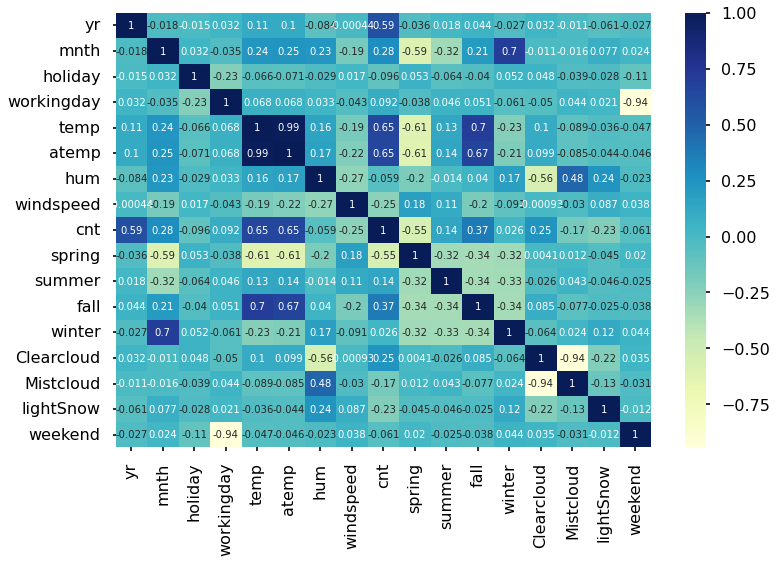

In [609]:
#understand the correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(dx_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [610]:
y_train = dx_train.pop('cnt')
x_train =dx_train
x_train.head()
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [611]:
x_train.shape

(510, 16)

In [612]:
#Taking Step by Step approach to identify the facotrs influencing the Bike sharing booking count
# Add Constant to the x_train dataset with one variable

x_train_am = am.add_constant(x_train['temp'])
x_train_am.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


In [613]:
# Create the model
model = am.OLS(y_train , x_train_am)

In [614]:
# Fit the model for one variable. You find R2 value is low and p value of variable temp is significant

model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.46e-61
Time:                        00:20:02   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [615]:
vif = pd.DataFrame()
vif['features'] = x_train_am.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_am.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,features,VIF
1,temp,3.88
0,const,1.04


In [616]:
# Drop Weekend Variable , not significant impact 

x_train_am = am.add_constant(x_train[['temp','weekend']])
x_train_am.head()

model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     181.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.90e-60
Time:                        00:20:02   Log-Likelihood:                -4449.3
No. Observations:                 510   AIC:                             8905.
Df Residuals:                     507   BIC:                             8917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1537.0519    178.022      8.634      0.000    1187.301    1886.803
temp        5558.5830    293.188     18.959      0.000    4982.571    6134.595
weekend     -131.2475    144.631     -0.907      0.365    -415.397     152.902
==============================================================================
Omnibus:                        5.691   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                4.218
Skew:                           0.093   Prob(JB):                        0.121
Kurtosis:                       2.595   Cond. No.                         6.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
#Add one more variable
x_train_am = am.add_constant(x_train[['temp','yr']])
x_train_am.head()

,const,temp,yr
576,1.0,0.815169,1
426,1.0,0.442393,1
728,1.0,0.245101,1
482,1.0,0.395666,1
111,1.0,0.345824,0


In [618]:
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.34e-130
Time:                        00:20:02   Log-Likelihood:                -4287.0
No. Observations:                 510   AIC:                             8580.
Df Residuals:                     507   BIC:                             8593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        710.9783    129.481      5.491      0.000     456.593     965.363
temp        5078.4395    214.297     23.698      0.000    4657.420    5499.459
yr          2057.7315     96.718     21.276      0.000    1867.714    2247.749
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [619]:
#Add one more variable
x_train_am = am.add_constant(x_train[['temp','yr','hum']])
x_train_am.head()


,const,temp,yr,hum
576,1.0,0.815169,1,0.725633
426,1.0,0.442393,1,0.640189
728,1.0,0.245101,1,0.498067
482,1.0,0.395666,1,0.504508
111,1.0,0.345824,0,0.751824


In [620]:
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     399.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.71e-133
Time:                        00:20:02   Log-Likelihood:                -4277.2
No. Observations:                 510   AIC:                             8562.
Df Residuals:                     506   BIC:                             8579.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1601.0045    237.355      6.745      0.000    1134.682    2067.327
temp        5235.6489    213.404     24.534      0.000    4816.382    5654.915
yr          2014.1942     95.485     21.094      0.000    1826.598    2201.791
hum        -1464.1592    329.710     -4.441      0.000   -2111.927    -816.391
==============================================================================
Omnibus:                       23.969   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.683
Skew:                          -0.442   Prob(JB):                     3.59e-07
Kurtosis:                       3.783   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [621]:
# p value of hum variable is very high , the variable is not significant

x_train_am = am.add_constant(x_train[['temp','yr','hum','Clearcloud']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     325.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.51e-138
Time:                        00:20:02   Log-Likelihood:                -4261.6
No. Observations:                 510   AIC:                             8533.
Df Residuals:                     505   BIC:                             8554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        481.5358    304.074      1.584      0.114    -115.871    1078.943
temp        4957.2919    212.975     23.276      0.000    4538.865    5375.719
yr          2038.7843     92.804     21.969      0.000    1856.454    2221.115
hum         -168.1224    393.979     -0.427      0.670    -942.161     605.917
Clearcloud   661.1366    117.168      5.643      0.000     430.940     891.333
==============================================================================
Omnibus:                       26.801   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.576
Skew:                          -0.453   Prob(JB):                     1.88e-08
Kurtosis:                       3.923   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
# Drop 'hum' and add Mistcloud variable

x_train_am = am.add_constant(x_train[['temp','yr','Clearcloud','Mistcloud']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.56e-146
Time:                        00:20:02   Log-Likelihood:                -4243.4
No. Observations:                 510   AIC:                             8497.
Df Residuals:                     505   BIC:                             8518.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1138.1589    276.028     -4.123      0.000   -1680.464    -595.853
temp        4922.9861    198.074     24.854      0.000    4533.835    5312.137
yr          2013.7591     89.116     22.597      0.000    1838.675    2188.843
Clearcloud  2214.0799    264.571      8.369      0.000    1694.284    2733.875
Mistcloud   1652.0807    269.006      6.141      0.000    1123.572    2180.590
==============================================================================
Omnibus:                       12.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.124
Skew:                          -0.335   Prob(JB):                      0.00141
Kurtosis:                       3.409   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [623]:
# Add one more variable atemp , you can notice that significance of temp variable is reduced. temp and atemp are multicollinear.

x_train_am = am.add_constant(x_train[['temp','yr','Clearcloud','Mistcloud','atemp']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
#model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     293.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.05e-146
Time:                        00:20:02   Log-Likelihood:                -4239.1
No. Observations:                 510   AIC:                             8490.
Df Residuals:                     504   BIC:                             8516.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1150.1360    274.018     -4.197      0.000   -1688.495    -611.777
temp        1012.8589   1351.534      0.749      0.454   -1642.476    3668.194
yr          2018.1363     88.470     22.812      0.000    1844.321    2191.951
Clearcloud  2169.7879    263.051      8.249      0.000    1652.976    2686.600
Mistcloud   1603.3695    267.536      5.993      0.000    1077.746    2128.993
atemp       4200.9128   1436.598      2.924      0.004    1378.454    7023.371
==============================================================================
Omnibus:                       16.728   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.630
Skew:                          -0.380   Prob(JB):                     9.01e-05
Kurtosis:                       3.546   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
#VIF 

In [625]:
vif = pd.DataFrame()
vif['features'] = x_train_am.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_am.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,features,VIF
2,yr,inf
3,Clearcloud,inf
4,Mistcloud,57.83
5,atemp,53.42
1,temp,3.88
0,const,1.04


In [626]:
# Drop atemp

x_train_am = am.add_constant(x_train[['temp','yr','Clearcloud','Mistcloud']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.56e-146
Time:                        00:20:02   Log-Likelihood:                -4243.4
No. Observations:                 510   AIC:                             8497.
Df Residuals:                     505   BIC:                             8518.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1138.1589    276.028     -4.123      0.000   -1680.464    -595.853
temp        4922.9861    198.074     24.854      0.000    4533.835    5312.137
yr          2013.7591     89.116     22.597      0.000    1838.675    2188.843
Clearcloud  2214.0799    264.571      8.369      0.000    1694.284    2733.875
Mistcloud   1652.0807    269.006      6.141      0.000    1123.572    2180.590
==============================================================================
Omnibus:                       12.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.124
Skew:                          -0.335   Prob(JB):                      0.00141
Kurtosis:                       3.409   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [627]:
vif = pd.DataFrame()
vif['features'] = x_train_am.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_am.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,features,VIF
2,yr,inf
3,Clearcloud,inf
4,Mistcloud,57.83
1,temp,3.88
0,const,1.04


In [628]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     298.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.41e-148
Time:                        00:20:02   Log-Likelihood:                -4235.6
No. Observations:                 510   AIC:                             8483.
Df Residuals:                     504   BIC:                             8509.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1388.8786    279.445     -4.970      0.000   -1937.900    -839.857
temp        5667.0960    271.441     20.878      0.000    5133.801    6200.391
Mistcloud   1649.0593    265.207      6.218      0.000    1128.012    2170.107
yr          1998.4774     87.942     22.725      0.000    1825.698    2171.256
Clearcloud  2218.8993    260.836      8.507      0.000    1706.439    2731.360
fall        -545.7973    138.292     -3.947      0.000    -817.498    -274.097
==============================================================================
Omnibus:                       13.346   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.390
Skew:                          -0.337   Prob(JB):                     0.000750
Kurtosis:                       3.472   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [629]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     278.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.90e-156
Time:                        00:20:02   Log-Likelihood:                -4213.3
No. Observations:                 510   AIC:                             8441.
Df Residuals:                     503   BIC:                             8470.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -616.8424    291.011     -2.120      0.035   -1188.588     -45.096
temp        5534.7984    260.834     21.220      0.000    5022.341    6047.256
Mistcloud   1494.1128    255.155      5.856      0.000     992.811    1995.414
yr          2010.3269     84.287     23.851      0.000    1844.729    2175.925
Clearcloud  2087.7342    250.689      8.328      0.000    1595.208    2580.261
fall        -628.6549    133.079     -4.724      0.000    -890.113    -367.197
windspeed  -1712.9823    252.837     -6.775      0.000   -2209.729   -1216.236
==============================================================================
Omnibus:                       14.355   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.101
Skew:                          -0.311   Prob(JB):                     0.000193
Kurtosis:                       3.646   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [630]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed','workingday']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.40e-156
Time:                        00:20:02   Log-Likelihood:                -4211.3
No. Observations:                 510   AIC:                             8439.
Df Residuals:                     502   BIC:                             8472.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -742.2971    296.739     -2.502      0.013   -1325.301    -159.293
temp        5511.8382    260.294     21.175      0.000    5000.438    6023.238
Mistcloud   1501.9658    254.413      5.904      0.000    1002.120    2001.812
yr          2005.6706     84.064     23.859      0.000    1840.511    2170.831
Clearcloud  2105.0315    250.078      8.418      0.000    1613.703    2596.360
fall        -629.7578    132.677     -4.747      0.000    -890.428    -369.087
windspeed  -1697.3401    252.192     -6.730      0.000   -2192.821   -1201.859
workingday   180.2003     89.457      2.014      0.045       4.444     355.957
==============================================================================
Omnibus:                       11.187   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.817
Skew:                          -0.240   Prob(JB):                     0.000999
Kurtosis:                       3.648   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [631]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed','workingday','lightSnow']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.40e-156
Time:                        00:20:02   Log-Likelihood:                -4211.3
No. Observations:                 510   AIC:                             8439.
Df Residuals:                     502   BIC:                             8472.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.0265    139.094      2.481      0.013      71.749     618.304
temp        5511.8382    260.294     21.175      0.000    5000.438    6023.238
Mistcloud    414.6422     89.717      4.622      0.000     238.376     590.909
yr          2005.6706     84.064     23.859      0.000    1840.511    2170.831
Clearcloud  1017.7079     85.680     11.878      0.000     849.372    1186.044
fall        -629.7578    132.677     -4.747      0.000    -890.428    -369.087
windspeed  -1697.3401    252.192     -6.730      0.000   -2192.821   -1201.859
workingday   180.2003     89.457      2.014      0.045       4.444     355.957
lightSnow  -1087.3236    190.043     -5.721      0.000   -1460.701    -713.946
==============================================================================
Omnibus:                       11.187   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.817
Skew:                          -0.240   Prob(JB):                     0.000999
Kurtosis:                       3.648   Cond. No.                     2.49e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [632]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed','workingday','winter']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.02e-169
Time:                        00:20:03   Log-Likelihood:                -4177.5
No. Observations:                 510   AIC:                             8373.
Df Residuals:                     501   BIC:                             8411.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1426.9013    289.621     -4.927      0.000   -1995.923    -857.880
temp        5513.0599    243.848     22.609      0.000    5033.969    5992.151
Mistcloud   1758.2927    240.272      7.318      0.000    1286.227    2230.359
yr          2006.8329     78.752     25.483      0.000    1852.107    2161.559
Clearcloud  2367.4744    236.339     10.017      0.000    1903.137    2831.812
fall        -328.8155    129.324     -2.543      0.011    -582.900     -74.731
windspeed  -1325.9657    240.334     -5.517      0.000   -1798.152    -853.780
workingday   220.1730     83.939      2.623      0.009      55.257     385.089
winter       831.6429     98.700      8.426      0.000     637.725    1025.561
==============================================================================
Omnibus:                       37.913   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.420
Skew:                          -0.409   Prob(JB):                     4.66e-19
Kurtosis:                       4.818   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [633]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed','workingday','winter','spring']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.87e-180
Time:                        00:20:03   Log-Likelihood:                -4148.2
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -283.5811    310.533     -0.913      0.362    -893.691     326.529
temp        4052.6644    296.973     13.647      0.000    3469.196    4636.133
Mistcloud   1763.1746    227.100      7.764      0.000    1316.987    2209.362
yr          2032.1335     74.505     27.275      0.000    1885.751    2178.516
Clearcloud  2413.5119    223.459     10.801      0.000    1974.478    2852.546
fall        -336.5392    122.237     -2.753      0.006    -576.702     -96.377
windspeed  -1331.2415    227.158     -5.860      0.000   -1777.543    -884.940
workingday   203.8333     79.365      2.568      0.011      47.904     359.763
winter       309.9301    114.799      2.700      0.007      84.382     535.478
spring     -1061.5650    136.132     -7.798      0.000   -1329.025    -794.105
==============================================================================
Omnibus:                       62.685   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.476
Skew:                          -0.582   Prob(JB):                     2.38e-40
Kurtosis:                       5.690   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [634]:
x_train_am = am.add_constant(x_train[['temp','Mistcloud','yr','Clearcloud','fall','windspeed','workingday','winter','spring','summer']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

# Remove variable summer as R2 remains same and signigicance of Fall p value reduced.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.87e-180
Time:                        00:20:03   Log-Likelihood:                -4148.2
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -444.4997    231.423     -1.921      0.055    -899.181      10.182
temp        4052.6644    296.973     13.647      0.000    3469.196    4636.133
Mistcloud   1763.1746    227.100      7.764      0.000    1316.987    2209.362
yr          2032.1335     74.505     27.275      0.000    1885.751    2178.516
Clearcloud  2413.5119    223.459     10.801      0.000    1974.478    2852.546
fall        -175.6206    134.522     -1.306      0.192    -439.919      88.677
windspeed  -1331.2415    227.158     -5.860      0.000   -1777.543    -884.940
workingday   203.8333     79.365      2.568      0.011      47.904     359.763
winter       470.8487     75.261      6.256      0.000     322.982     618.715
spring      -900.6464     94.413     -9.539      0.000   -1086.142    -715.150
summer       160.9186     97.342      1.653      0.099     -30.330     352.168
==============================================================================
Omnibus:                       62.685   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.476
Skew:                          -0.582   Prob(JB):                     2.38e-40
Kurtosis:                       5.690   Cond. No.                     5.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [635]:
vif = pd.DataFrame()
vif['features'] = x_train_am.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_am.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif


,features,VIF
2,Mistcloud,inf
3,yr,inf
8,winter,inf
9,spring,inf
10,summer,inf
4,Clearcloud,57.83
5,fall,53.42
1,temp,3.88
6,windspeed,1.89
7,workingday,1.24


In [636]:
x_train_am = am.add_constant(x_train[['temp','yr','Clearcloud','windspeed','spring','hum','winter','Mistcloud','summer']])
model = am.OLS(y_train , x_train_am)
model = model.fit()
model.params
model.summary()

# R2 and adjusted R2 are very close indicates the model has no redundant variables also all the variables p alues indicate they are significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.41e-182
Time:                        00:20:03   Log-Likelihood:                -4145.1
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     500   BIC:                             8352.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        504.4802    428.062      1.179      0.239    -336.541    1345.502
temp        4327.4194    303.916     14.239      0.000    3730.310    4924.529
yr          2007.7528     74.476     26.958      0.000    1861.428    2154.078
Clearcloud  2048.6432    241.345      8.488      0.000    1574.467    2522.819
windspeed  -1604.2958    235.972     -6.799      0.000   -2067.914   -1140.677
spring      -661.4527    182.093     -3.633      0.000   -1019.214    -303.692
hum        -1235.7312    343.524     -3.597      0.000   -1910.660    -560.803
winter       742.7781    149.456      4.970      0.000     449.139    1036.417
Mistcloud   1608.8479    229.031      7.025      0.000    1158.866    2058.830
summer       383.7754    122.072      3.144      0.002     143.939     623.612
==============================================================================
Omnibus:                       72.540   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.681
Skew:                          -0.700   Prob(JB):                     1.96e-43
Kurtosis:                       5.701   Cond. No.                         25.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [637]:
vif = pd.DataFrame()
vif['features'] = x_train_am.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train_am.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending=False)
vif

,features,VIF
2,yr,inf
3,Clearcloud,inf
8,Mistcloud,inf
9,summer,inf
4,windspeed,57.83
5,spring,53.42
1,temp,3.88
6,hum,1.89
7,winter,1.24
0,const,1.04


In [638]:
y_train_pred = model.predict(x_train_am)

In [639]:
res = y_train - y_train_pred

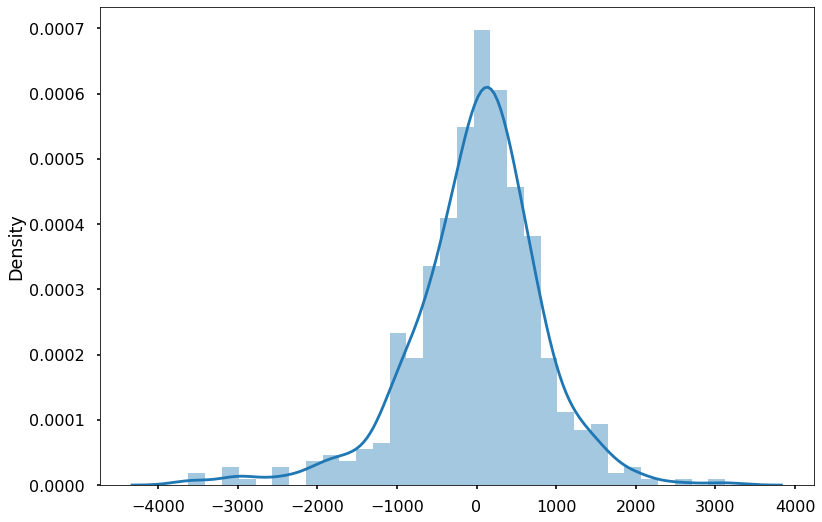

In [640]:
res
sns.distplot(res)
plt.show()

# Residual plot exhibits a nromal distribution

In [641]:
#Evaluation of the model

dx_test.shape
dx_test.head()
y_test = dx_test.pop('cnt')
numeric_vars = ['temp','atemp','hum','windspeed']
dx_test[numeric_vars]

dx_test[numeric_vars] = scaler.fit_transform(dx_test[numeric_vars])
dx_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,fall,winter,Clearcloud,Mistcloud,lightSnow,weekend
184,0,7,1,0,0.837241,0.778767,0.534223,0.149393,0,0,1,0,0,1,0,0
535,1,6,0,1,0.911423,0.855132,0.470417,0.231142,0,1,0,0,1,0,0,0
299,0,10,0,1,0.496221,0.492359,0.777843,0.443398,0,0,0,1,0,1,0,0
221,0,8,0,1,0.890387,0.805661,0.236659,0.449707,0,0,1,0,1,0,0,0
152,0,6,0,1,0.821739,0.749249,0.070765,0.682387,0,1,0,0,1,0,0,0


In [642]:
x_test = dx_test[['temp','yr','Clearcloud','windspeed','spring','hum','winter','Mistcloud','summer']]
x_test_am = am.add_constant(x_test)

x_test_am.head()

,const,temp,yr,Clearcloud,windspeed,spring,hum,winter,Mistcloud,summer
184,1.0,0.837241,0,0,0.149393,0,0.534223,0,1,0
535,1.0,0.911423,1,1,0.231142,0,0.470417,0,0,1
299,1.0,0.496221,0,0,0.443398,0,0.777843,1,1,0
221,1.0,0.890387,0,1,0.449707,0,0.236659,0,0,0
152,1.0,0.821739,0,1,0.682387,0,0.070765,0,0,1


In [643]:
model = am.OLS(y_test , x_test_am)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           4.81e-73
Time:                        00:20:03   Log-Likelihood:                -1784.9
No. Observations:                 220   AIC:                             3590.
Df Residuals:                     210   BIC:                             3624.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1312.6307    654.383      2.006      0.046      22.628    2602.633
temp        3488.0298    413.104      8.443      0.000    2673.667    4302.393
yr          2035.5943    115.606     17.608      0.000    1807.697    2263.491
Clearcloud  1415.7575    416.492      3.399      0.001     594.716    2236.799
windspeed   -495.7076    332.691     -1.490      0.138   -1151.549     160.134
spring     -1221.2944    278.418     -4.387      0.000   -1770.146    -672.443
hum        -1209.4015    404.635     -2.989      0.003   -2007.069    -411.734
winter       687.1992    226.177      3.038      0.003     241.332    1133.067
Mistcloud   1146.4635    381.877      3.002      0.003     393.660    1899.267
summer       158.6309    175.803      0.902      0.368    -187.933     505.195
==============================================================================
Omnibus:                       26.065   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.514
Skew:                          -0.753   Prob(JB):                     1.94e-08
Kurtosis:                       4.267   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [644]:
y_test_pred = model.predict(x_test_am)

In [645]:
r2_score(y_true=y_test,y_pred=y_test_pred)
r2_score(y_true=y_train,y_pred=y_train_pred)

0.823187228502935

In [646]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

652198.4473224208

In [647]:
# Model with R2 of 81% and adjusted R value very close to R2 value, all variables p value are signifcant, most of the independent variables VIF is close to infinity.
#Indicating perfect correlation
#r2_score of 0.82